# Titanic Predictive Model.

***Before we Begin:***

If you liked my work, please upvote this kernel since it will keep me motivated to perform more in-depth reserach towards this subject and will look for more efficient ways so that our models are able to detect more accurately both survived and non-survived people. For more kernel please follow me and any questions please mention below discussion.

***Our Goals:***
1. Understand the little distribution of the "little" data that was provided to us.
2. Create a 50/50 sub-dataframe ratio of "Survived" and "Non-Survived" onboarded people.
3. Determine the Classifiers we are going to use and decide which one has a higher accuracy.
4. Create a Neural Network and compare the accuracy to our best classifier.
5. Understand common mistaked made with imbalanced datasets.

**Table of content:**

   **1. Data Preprocessing**

    1a. Importing Datasets
    1b. Descriptive Statistical Analysis
    1c. Descriptive Statistical Visualisation Analysis
    1d. Visualisation Each Attribute Using Seaborn
    
  **2. Feature Engineering**
  
     2a. Imputation or Data Cleaning
     2b. Label Encoder
     2c. OneHotEncoder
     2d. Handling Outliers
     2e. Converting Imbalance Dataset to Balanced Dataset
     2f. Binning
     2g. Log Transformation
     2h. Feature Scaling
     2i. Feature Split
     
   **3. Feature Selection**
   
     3a. Univariate Selection
     3b. Feature Importance
     3c. Correlation Matrix With HeatMap
     3d. Principal Component Analysis (PCA)
     3e. Discrimenent Component Analysis (DCA)
    
   **4. Model Selection**
   
     4a. Model Selection Using Spot Check and Compare Algorithms Without Feature Scaling
     4b. Model Selection Using Spot Check and Compare Algorithms With Feature Scaling
     4c. Regularization Hyper Parameter Tunning For Navie Bayes and KNN
     4d. Ensemble Algorithms (Bagging and Boosting Algorithms)
     4e. Regularization Hyper Parameter Tunning For Random Forest Classifier
     4f. Regularization Hyper Parameter Tunning For Extra Tree Classifier
     4g. Regularization Hyper Parameter Tunning For Ada Boost Classifier
     4h. Regularization Hyper Parameter Tunning For Gradient Boosting Classifier
     4i. Gradient Boosting Algorithm For Titanic Survived Predictions.

# 1. Data Preprocessing

Data preprocessing is the important pipeline to Building a data science project. We do lot of process of cleaning and extract insights for bussiness problem.

**1a. Importing Datasets**

In [104]:
import pandas as pd

train_dataset=pd.read_csv('train.csv')
test_dataset=pd.read_csv('test.csv')

Displaying the head of training and test sets.

In [105]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Now, we are going to extract the insights of datasets like shape, describe and datatype statistical analysis. Which it helps to analyze the dataset...

**1b. Descriptive Statistical Analysis**

In [107]:
# Displaying Shape of training set
train_dataset.shape

(891, 12)

Train dataset having 891 rows(passangers) and 12 column (Features)attributes.

In [108]:
# Displaying Shape of test dataset
test_dataset.shape

(418, 11)

Test dataset having 418 rows(passangers) and 11 column (Features) attributes.

In [109]:
# Displaying datatype of each attributes for train dataset
train_dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [110]:
# Displaying datatype of each attributes for test dataset
test_dataset.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [111]:
# Displaying descritive statistical analysis for train dataset

train_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [112]:
# Displaying descritive statistical analysis for test dataset
test_dataset.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


***1c. Descriptive Statistical Visualisation Analysis***

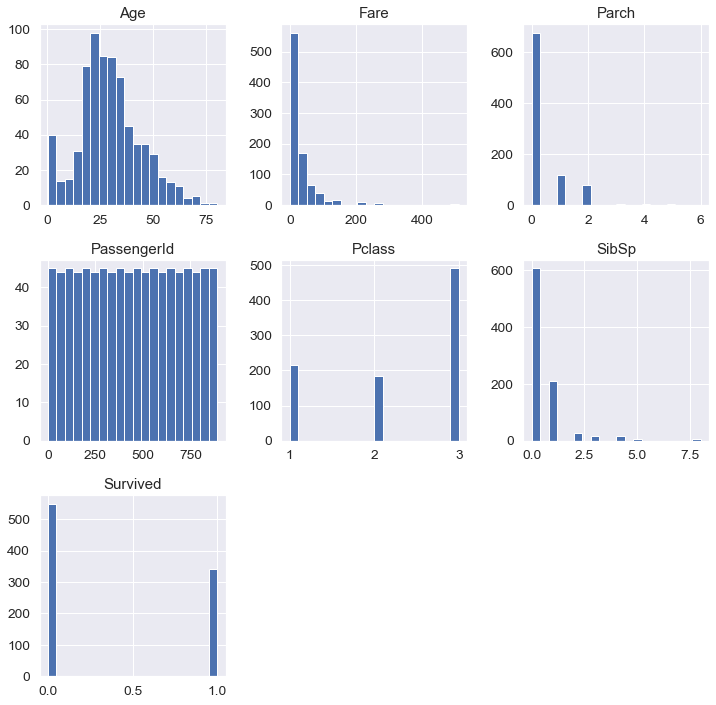

In [113]:
# Histogram plot statistical visualisation analysis for train dataset
import matplotlib.pyplot as plt
train_dataset.hist(bins=20,figsize=(12,12),layout=(3,3))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000273F0441B88>,
      dtype=object)

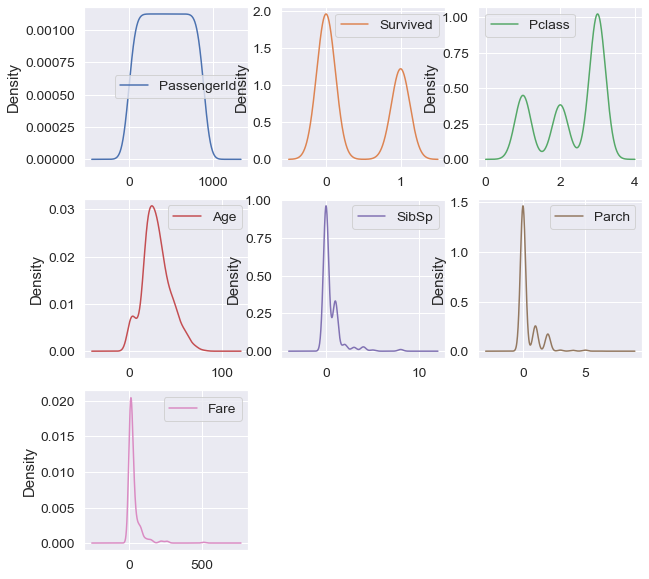

In [114]:
# Density plot statistical visualisation analysis for train datasets

train_dataset.plot(kind='density',figsize=(10,10),layout=(3,3),subplots=True,sharex=False,sharey=False)

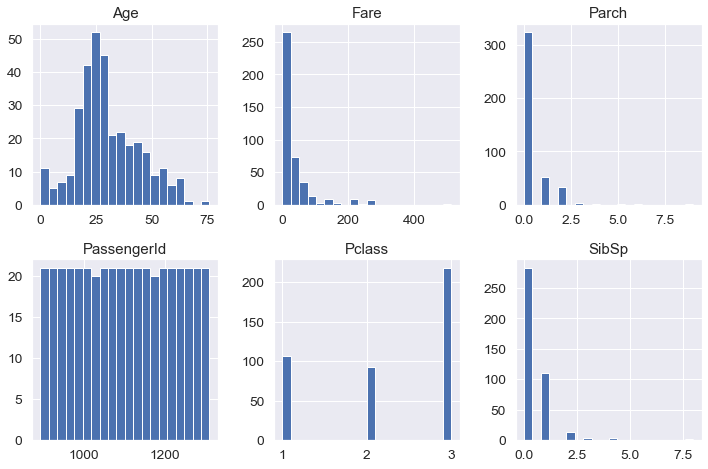

In [115]:
# Histogram plot statstical visualisation analysis for test dataset

test_dataset.hist(bins=20,figsize=(12,12),layout=(3,3))
plt.show()

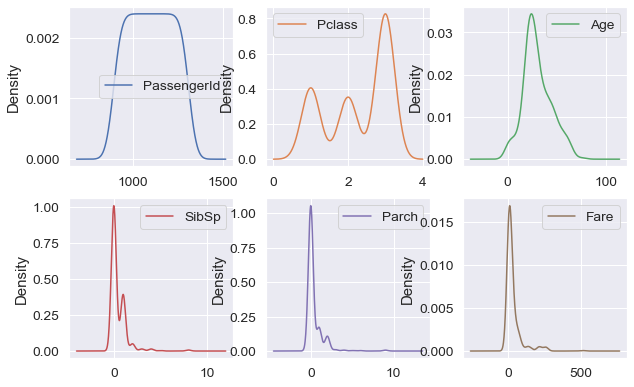

In [116]:
# Density plot Stastistical Visualisation analysis for test dataset
test_dataset.plot(kind='density',figsize=(10,10),layout=(3,3),sharex=False,sharey=False,subplots=True)
plt.show()

**1d. Visualisation Each Attribute Using Seaborn**

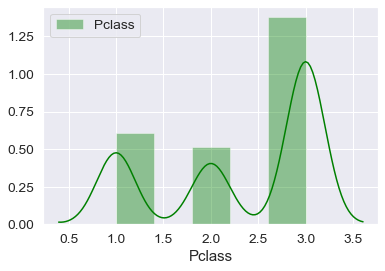

In [117]:
# extracting insights of "Pclass" attribute using statistical visualisation distribution.

# kde--- kind distribution wave
# color--- color of graphical plot
# norm_hist --- True or false makes normal distribution graph should be there or not.


import seaborn as sb
sb.distplot(train_dataset['Pclass'],bins=5,hist=True,norm_hist=True,color='green',vertical=False,kde=True,label='Pclass')
plt.legend()
plt.show()

Above Pclass attribute look like exponential distribution. Lets go ahead with other attributes

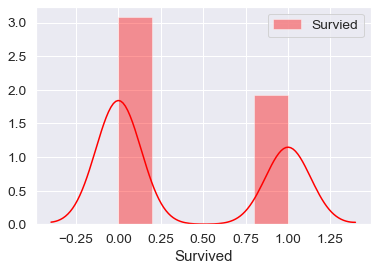

In [118]:
# Survived output attribute( its optional to visualise )

sb.distplot(train_dataset['Survived'],color='red',bins=5,hist=True,norm_hist=True,vertical=False,kde=True,label='Survied')
plt.legend()
plt.show()

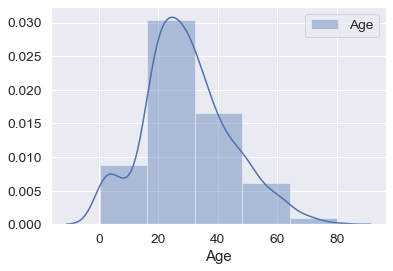

In [119]:
# Age attribute

sb.distplot(train_dataset['Age'],bins=5,hist=True,norm_hist=True,vertical=False,label='Age')
plt.legend()

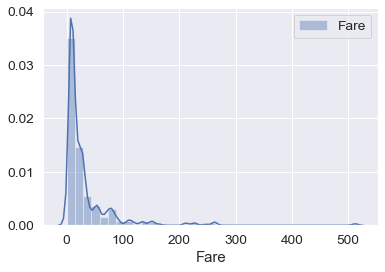

In [120]:
# Fare Attribute

sb.distplot(train_dataset['Fare'],bins=35,vertical=False,hist=True,norm_hist=True,label='Fare')
plt.legend()

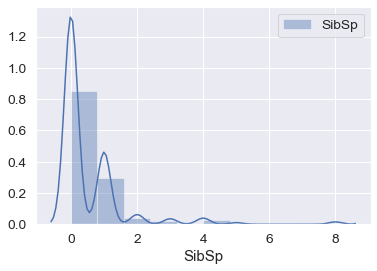

In [121]:
# SibSp attribute

sb.distplot(train_dataset['SibSp'],label='SibSp', bins=10, hist=True, vertical=False,norm_hist=True)
plt.legend()

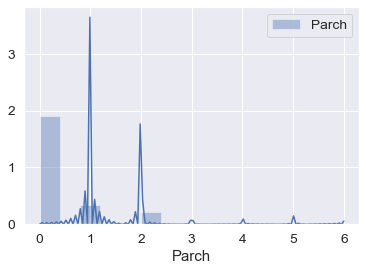

In [122]:
    # Parch attribute

    sb.distplot(train_dataset['Parch'],label='Parch',bins=15, hist=True,vertical=False,norm_hist=True)
    plt.legend()

As we can absorb above density plot different column attributes obey different distribution... We need to apply Feature scaling to keep all attribute values in same range scale.

# 2. Feature Engineering 

Feature Engineering is very important step in data preprocessing...

Feature engineering techniques:

     2a. Imputation or Data Cleaning
     2b. Label Encoder
     2c. OneHotEncoder
     2d. Handling Outliers
     2e. Converting Imbalance Dataset to Balanced Dataset
     2f. Binning
     2g. Log Transformation
     2h. Feature Scaling
     2i. Feature Split

***2a. Imputation or Data Cleaning***

Handling the missing or empty values in both train and test dataset.

In [123]:
# Displaying the null values list for each attribute

# train dataset
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [124]:
# test dataset

test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


As per the above train and test dataset display. we have lot of info like datatypes,null values, null type( null or non null).

So we dont no exactly, How? many missing values from each attribute. so below isna() will print numerical number count for each attribute.

In [125]:
# Displaying the sum of null value count in each attribute from train dataset

train_dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have 177, 687 and 2 null values on respective attributes.

***Missing value ratio on  both training and test set***

Displaying the missing value ratio on training dataset

In [126]:
train_dataset_null=(train_dataset.isna().sum()/len(train_dataset))*100.0

# Now we are droping all values ratio is equal zero in all_data_null variable
all_data_null= train_dataset_null.drop(train_dataset_null[train_dataset_null==0].index).sort_values(ascending=False)

print(all_data_null)

Cabin       77.104377
Age         19.865320
Embarked     0.224467
dtype: float64


Now visualising the missing value ratio in barplot

Text(0.5, 1.0, 'percentage of missing ratio on barplot')

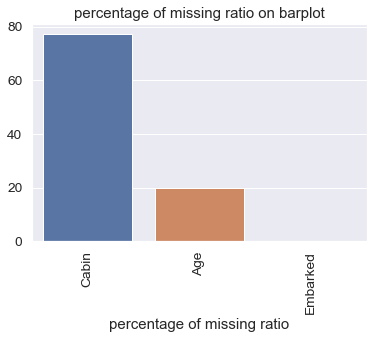

In [127]:
sb.barplot(x=all_data_null.index,y=all_data_null)
plt.xlabel('Feature')
plt.xticks(rotation='90')
plt.xlabel('percentage of missing ratio')
plt.title('percentage of missing ratio on barplot')

In [128]:
# Displaying the sum of null value count in each attribute from test dataset

test_dataset.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

As absorbed above both train and test null values, we have maximum missing values in Cabin attibute. so we are going to drop that feature attribute.

We are going to replace the age attribute missing values with mean of that attribute.

Displaying the missing ratio for test set

We have 2 options either we can remove missing value row or else replace missing values with mean of that attribute.

so here, I'm selected 2 option missing values replace with mean.

In [129]:
# Removing the Cabin column in both train and test dataset

train_dataset=train_dataset.drop('Cabin',axis=1)

In [130]:
train_dataset=train_dataset.fillna(train_dataset.mean())

In [131]:
train_dataset.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

We are going to remove the embarked 2 missing values, beacuse embarked is object attribute.

In [132]:
train_dataset=train_dataset.dropna(axis=0)

In [133]:
train_dataset.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [134]:
test_null_ratio=(test_dataset.isna().sum()/len(test_dataset))*100.0

# Now we are droping all values ratio is equal zero in all_data_null variable

all_null_value_ratio=test_null_ratio.drop(test_null_ratio[test_null_ratio==0].index).sort_values(ascending=False)

print(all_null_value_ratio)

Cabin    78.229665
Age      20.574163
Fare      0.239234
dtype: float64


Text(0.5, 1.0, 'visualising the Missing value ratio on barplot')

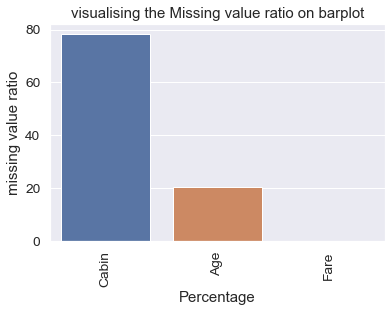

In [135]:
# Missing value ratio using visualising the barplot
sb.barplot(x=all_null_value_ratio.index,y=all_null_value_ratio)
plt.xlabel('Percentage')
plt.xticks(rotation='90')
plt.ylabel('missing value ratio')
plt.title('visualising the Missing value ratio on barplot')

In [136]:
# Removing the null values from test dataset
test_dataset=test_dataset.drop('Cabin',axis=1)

In [137]:
test_dataset=test_dataset.fillna(test_dataset.mean())

In [138]:
# Checking the null values removed or not from test dataset

test_dataset.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

All null values removed from train and test dataset, So now we can safely go ahead with other process.

We can see more information about categorical encoding here https://pbpython.com/categorical-encoding.html

**Removing unwanted attributes**

We can remove the unwanted attribute like name and passengerid's. this attributes are not much important to extract insights.

In [139]:
train_dataset=train_dataset.drop('PassengerId',axis=1)
train_dataset=train_dataset.drop('Name',axis=1)
train_dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [140]:
# Kepping duplicate for test dataset
test_dataset1=test_dataset

test_dataset=test_dataset.drop('PassengerId',axis=1)
test_dataset=test_dataset.drop('Name',axis=1)
test_dataset.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,34.5,0,0,330911,7.8292,Q
1,3,female,47.0,1,0,363272,7.0000,S
2,2,male,62.0,0,0,240276,9.6875,Q
3,3,male,27.0,0,0,315154,8.6625,S
4,3,female,22.0,1,1,3101298,12.2875,S


**2b. Label Encoder**

Encoding the categorical text to numerical values.

**Without DataFrame:**

If we already converted dataset from dataframe into array vector, With the help of sklearn library we can eassly convert categorical to numerical

1. from sklear.preprocessing import LabelEncoder
2. label=LabelEncoder()
3. dataset[:,2] = label.fit_transform(dataset[:,2]) --- encoding sex attribute 
4. dataset[:,6] = label.fit_transform(dataset[:,6]) --- encoding ticket attribute
5. dataset[:,8] = label.fit_transform(dataset[:,8]) --- encoding embarked attribute
6. dataset.head()

see result all those attribute are encoded with numerical values. then safely we can go ahead.


**With Dataframe:**

If we not yet converted dataset from dataframe to array of vector then label encoding technique we should use uniquly.....

Here also we can use 2 techniques,

**First technique(mannual technique):** If we have more than 100 attribute it will hard to follow this technique

1. dataset['Sex'].unqiue()---- We will get different kind of text like male and female
2. dataset['sex']=dataset['sex'].map({'male':0,'female':1}) --- we mapped male the male value as 0 and female value as 1...
3. dataset.head() ---- we can check those text update with numerics....

**Second technique ( Automatic technique) :** This technique use sklearn library.....

1. from sklearn.preprocessing import LabelEncoder
2. label=LabelEncoder()
3. dataset['sex']=label.fit_transform(dataset['sex'])----it look bit simlar with above code but this syntax uses for dataframe
4. dataset.head() ----- we can check those text update with numerics....

In [141]:
train_dataset['Sex'].unique()

array(['male', 'female'], dtype=object)

In [142]:
train_dataset['Sex']=train_dataset['Sex'].map({'female':1,'male':0})
train_dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,0,22.0,1,0,A/5 21171,7.2500,S
1,1,1,1,38.0,1,0,PC 17599,71.2833,C
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,1,35.0,1,0,113803,53.1000,S
4,0,3,0,35.0,0,0,373450,8.0500,S


In [143]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
train_dataset['Ticket']=label.fit_transform(train_dataset['Ticket'])
train_dataset['Embarked']=label.fit_transform(train_dataset['Embarked'])
train_dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,0,22.0,1,0,522,7.2500,2
1,1,1,1,38.0,1,0,595,71.2833,0
2,1,3,1,26.0,0,0,668,7.9250,2
3,1,1,1,35.0,1,0,48,53.1000,2
4,0,3,0,35.0,0,0,471,8.0500,2


In [144]:
test_dataset['Sex']=label.fit_transform(test_dataset['Sex'])
test_dataset['Ticket']=label.fit_transform(test_dataset['Ticket'])
test_dataset['Embarked']=label.fit_transform(test_dataset['Embarked'])
test_dataset.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,1,34.5,0,0,152,7.8292,1
1,3,0,47.0,1,0,221,7.0000,2
2,2,1,62.0,0,0,73,9.6875,1
3,3,1,27.0,0,0,147,8.6625,2
4,3,0,22.0,1,1,138,12.2875,2


**2c. OneHotEncoder ( Encoding numerical values in dummy values)**

One hot encoder is very useful to encode value from numerical values into dummy values...like we have 1,2,3,4 different kind of values in an attribute.. So by applying onehot encoder it will create 3 attribute like binary code( 1- 0 0 1, 2 - 0 1 0, 3 - 0 1 1, 4- 1 0 0) likewise.

It will be a good technique, if we have few number of numerical values. so dummy values attribute will create few only. suppose if you have more then 100 numerica value then dummy attribute will increase gradually. dimensation and vector quantity will increase rapidely.

onehotencoder having an issue with dummy variable trap. to handle, we need to perform this logic (dummy attribute=1-total dummy attributes).

so better we use feature scaling it will rescale all values from different range to same range -1 to 1 or 0 to 1....

**2d. Handling Outliers ( Removing outlier rows)**

If outliers exist in our dataset, then our model predicition wont be accuracte.

It might overfit or underfit the training dataset. so it wont extract the insights and test set performance wont be good.

I mainly focused on 2 techniques to remove outliers.

1. Analyze each attribute and remove outlier mannual threshold..
2. Using threshold upper and lower values..

technique 1 will be used when we have less no.of feature attribute below 15. if more attribute then better option is go with technique 2..

**Technique 1: Analyze attribute and remove outlier with mannual thredhold**

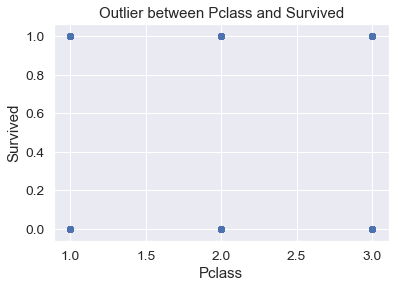

In [145]:
# outlier checking between Survived and Pclass attributes....

plt.scatter(train_dataset['Pclass'],train_dataset['Survived'])
plt.xlabel("Pclass")
plt.ylabel("Survived")
plt.title("Outlier between Pclass and Survived")
plt.show()

Above plot was bit akward. but its clear there is not

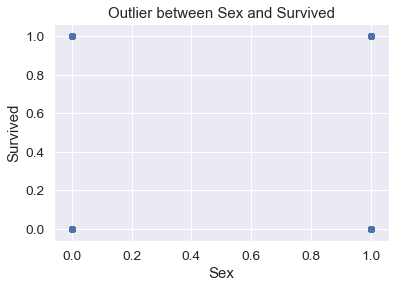

In [146]:
# outlier checking between Survived and Sex attributes....

plt.scatter(train_dataset['Sex'],train_dataset['Survived'])
plt.xlabel("Sex")
plt.ylabel("Survived")
plt.title("Outlier between Sex and Survived")
plt.show()

No outlier identified!!!

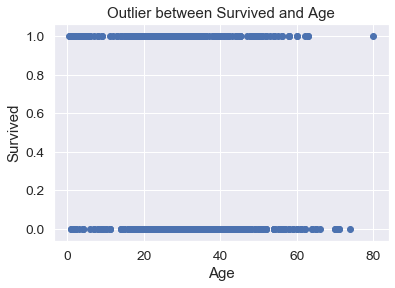

In [147]:
# outlier checking between Survived and Age attributes....

plt.scatter(train_dataset['Age'],train_dataset['Survived'])
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Outlier between Survived and Age')
plt.show()

As per above plot, we have some outlier after 80 age, so we are going to remove after 80 years age.

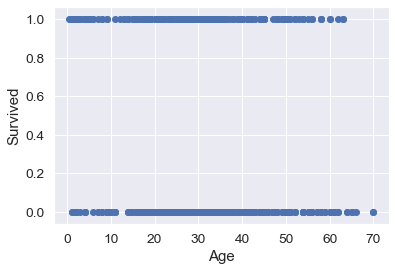

In [148]:
# removing outlier between age and survived...

# Deleting outliers

train_dataset=train_dataset.drop(train_dataset[(train_dataset['Age']>70)].index)

plt.scatter(train_dataset['Age'],train_dataset['Survived'])
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

We sucessfully removed outlier value after age 70 years...

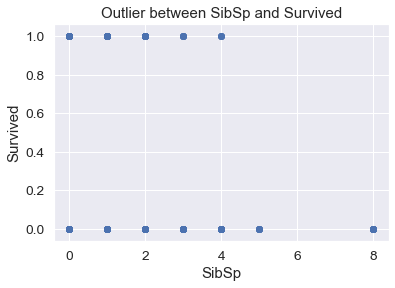

In [149]:
# Outlier checking between SibSp and Survived

plt.scatter(train_dataset['SibSp'],train_dataset['Survived'])
plt.xlabel('SibSp')
plt.ylabel('Survived')
plt.title('Outlier between SibSp and Survived')
plt.show()

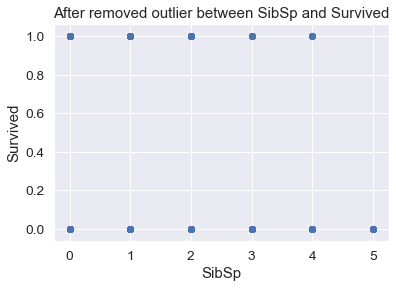

In [150]:
# We found outlier between SibSp and Survived, We are going to remove all values after 5 sbisp

train_dataset=train_dataset.drop(train_dataset[(train_dataset['SibSp'])>5].index)

plt.scatter(train_dataset['SibSp'],train_dataset['Survived'])
plt.xlabel('SibSp')
plt.ylabel('Survived')
plt.title('After removed outlier between SibSp and Survived')
plt.show()

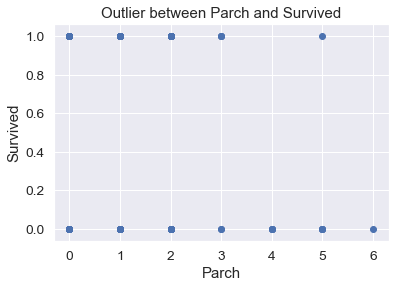

In [151]:
# Outlier check between Parch and Survived

plt.scatter(train_dataset['Parch'],train_dataset['Survived'])
plt.xlabel('Parch')
plt.ylabel('Survived')
plt.title('Outlier between Parch and Survived')
plt.show()

There are no outliers!!!

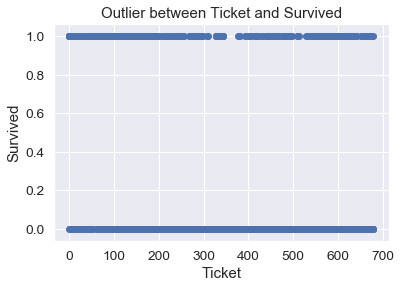

In [152]:
# Checking outlier between Ticket and survived

plt.scatter(train_dataset['Ticket'],train_dataset['Survived'])
plt.xlabel('Ticket')
plt.ylabel('Survived')
plt.title('Outlier between Ticket and Survived')
plt.show()

No outliers found!!!

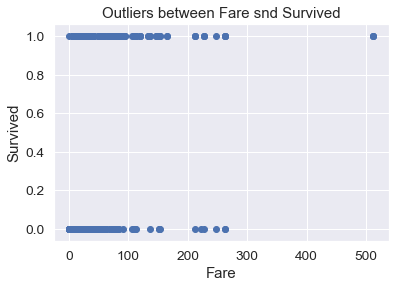

In [153]:
# Checking outliers between Fare and Survived

plt.scatter(train_dataset['Fare'],train_dataset['Survived'])
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.title('Outliers between Fare snd Survived')
plt.show()

Outliers found between Fare and Survived, we'r gone remove greater than 300 fare.

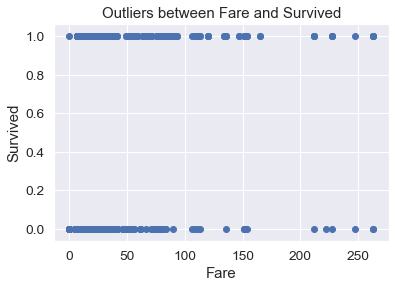

In [154]:
# Removing the outliers between Fare and Survived

train_dataset=train_dataset.drop(train_dataset[train_dataset['Fare']>300].index)

plt.scatter(train_dataset['Fare'],train_dataset['Survived'])
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.title('Outliers between Fare and Survived')
plt.show()

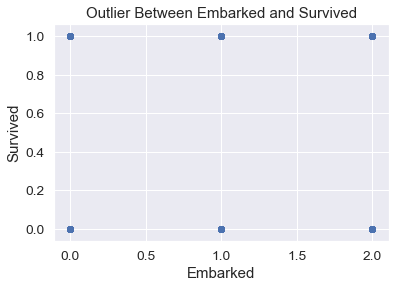

In [155]:
# Checking Outliers between Embarked and Survived

plt.scatter(train_dataset['Embarked'],train_dataset['Survived'])
plt.xlabel('Embarked')
plt.ylabel('Survived')
plt.title('Outlier Between Embarked and Survived')
plt.show()

No Outlier found!!!!

**Technique 2:Using threshold upper and lower values..**

**Anomaly Detection:**


Our main aim in this section is to remove "extreme outliers" from features that have a high correlation with our classes. This will have a positive impact on the accuracy of our models.


**Interquartile Range Method:**

**Interquartile Range (IQR):** We calculate this by the difference between the 75th percentile and 25th percentile. Our aim is to create a threshold beyond the 75th and 25th percentile that in case some instance pass this threshold the instance will be deleted.

**Boxplots:** Besides easily seeing the 25th and 75th percentiles (both end of the squares) it is also easy to see extreme outliers (points beyond the lower and higher extreme).

**Outlier Removal Tradeoff:**
We have to be careful as to how far do we want the threshold for removing outliers. We determine the threshold by multiplying a number (ex: 1.5) by the (Interquartile Range). The higher this threshold is, the less outliers will detect (multiplying by a higher number ex: 3), and the lower this threshold is the more outliers it will detect.


**The Tradeoff:** The lower the threshold the more outliers it will remove however, we want to focus more on "extreme outliers" rather than just outliers. Why? because we might run the risk of information loss which will cause our models to have a lower accuracy. You can play with this threshold and see how it affects the accuracy of our classification models.

**Summary:**

Visualize Distributions: We first start by visualizing the distribution of the feature we are going to use to eliminate some of the outliers. V14 is the only feature that has a Gaussian distribution.
Determining the threshold: After we decide which number we will use to multiply with the iqr (the lower more outliers removed), we will proceed in determining the upper and lower thresholds by substrating q25 - threshold (lower extreme threshold) and adding q75 + threshold (upper extreme threshold).

**Conditional Dropping:** Lastly, we create a conditional dropping stating that if the "threshold" is exceeded in both extremes, the instances will be removed.
Boxplot Representation: Visualize through the boxplot that the number of "extreme outliers" have been reduced to a considerable amount.

**Note:** After implementing outlier reduction our accuracy has been improved by over 3%! Some outliers can distort the accuracy of our models but remember, we have to avoid an extreme amount of information loss or else our model runs the risk of underfitting.

**Reference:** More information on Interquartile Range Method: How to Use Statistics to Identify Outliers in Data by Jason Brownless https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/ (Machine Learning Mastery blog)


***Converting Imbalance Dataset to Balanced Dataset***

Identifying the dataset is whether balanced or imbalanced data ?

In [156]:
servived_data= train_dataset['Survived'].value_counts()[1]/len(train_dataset)*100.0
non_servived_data=train_dataset['Survived'].value_counts()[0]/len(train_dataset)*100.0

print("servived dataset",servived_data)
print("non_servived dataset",non_servived_data)
print("servived data rows ",train_dataset['Survived'].value_counts()[1])
print("non servived data rows ",train_dataset['Survived'].value_counts()[0])

servived dataset 38.443935926773456
non_servived dataset 61.556064073226544
servived data rows  336
non servived data rows  538


As per above result, we have 38% servived dataset and 62% non- survived peoples.

Now we have 2 options, they are:

1. we can go ahead with this dataset. its not bad! we can say ok to build the model.
2. If we need accurate accuracy we should balance this unablanced dataset into balanced. so we will get better predictions.

**Note:** Notice how imbalanced is our original dataset! Most of the dataset are non-servived. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most dataset are not servived. But we don't want our model to assume, we want our model to detect patterns that give signs of servived!

Text(0.5, 1.0, 'class Distribution \n(0 : Non Servived || 1: Servived)')

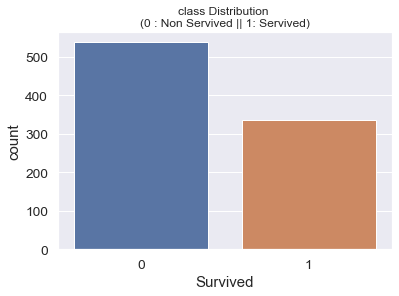

In [157]:
# Visualise the class distribution.

sb.countplot('Survived',data=train_dataset)
plt.title('class Distribution \n(0 : Non Servived || 1: Servived)',fontsize=12)

**What is a sub-Sample?**
In this scenario, our subsample will be a dataframe with a 50/50 ratio of fraud and non-fraud transactions. Meaning our sub-sample will have the same amount of fraud and non fraud transactions.

**Why do we create a sub-Sample?**
In the beginning of this notebook we saw that the original dataframe was heavily imbalanced! Using the original dataframe will cause the following issues:
1. Overfitting: Our classification models will assume that in most cases there are no frauds! What we want for our model is to be certain when a fraud occurs.
2. Wrong Correlations: Although we don't know what the "V" features stand for, it will be useful to understand how each of this features influence the result (Fraud or No Fraud) by having an imbalance dataframe we are not able to see the true correlations between the class and features.

**Random Under-Sampling:**

In this phase of the project we will implement "Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

**Steps:**
1. The first thing we have to do is determine how imbalanced is our class (use "value_counts()" on the class column to determine the amount for each label)
2. Once we determine how many instances are considered servived dataset (servived = "1") , we should bring the non-servivide dataset to the same amount as servived dataset (assuming we want a 50/50 ratio), this will be almost equivalent to 336 cases of servived and 336 cases of non-servived dataset.
3. After implementing this technique, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. Then the next step we will implement is to shuffle the data to see if our models can maintain a certain accuracy everytime we run this script.

**Note:** The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss (bringing 336 non-servived dataset from 538 non-servived dataset)

In [158]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

#train_dataset=train_dataset.sample(frac=1)

servived_data=train_dataset.loc[train_dataset['Survived'] == 1]
non_servived_data=train_dataset.loc[train_dataset['Survived'] == 0][:336]

nomal_distribution_dataset=pd.concat([servived_data,non_servived_data])

# Shuffle dataframe rows
balanced_train_dataset=nomal_distribution_dataset.sample(frac=1,random_state=5)

balanced_train_dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
643,1,3,0,29.699118,0,0,79,56.4958,2
298,1,1,0,29.699118,0,0,97,30.5000,2
465,0,3,0,38.000000,0,0,638,7.0500,2
346,1,2,1,40.000000,0,0,256,13.0000,2
875,1,3,1,15.000000,0,0,194,7.2250,0


Distribution of the classes in the subsample dataset
1    0.384439
0    0.384439
Name: Survived, dtype: float64


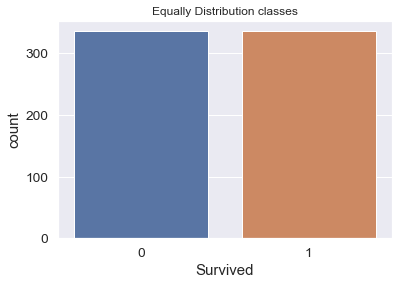

In [159]:
print("Distribution of the classes in the subsample dataset")
print(balanced_train_dataset['Survived'].value_counts()/len(train_dataset))

sb.countplot('Survived',data=balanced_train_dataset)
plt.title("Equally Distribution classes",fontsize=12)
plt.show()

For more information about imbalanced dataset refer this site https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb

**2g. Log Transformation**

The log-transformation is widely used in biomedical and psychosocial research to deal with skewed data. This paper highlights serious problems in this classic approach for dealing with skewed data. Despite the common belief that the log transformation can decrease the variability of data and make data conform more closely to the normal distribution, this is usually not the case. Moreover, the results of standard statistical tests performed on log-transformed data are often not relevant for the original, non-transformed data.We demonstrate these problems by presenting examples that use simulated data. We conclude that if used at all, data transformations must be applied very cautiously. We recommend that in most circumstances researchers abandon these traditional methods of dealing with skewed data and, instead, use newer analytic methods that are not dependent on the distribution the data, such as generalized estimating equations (GEE).

Keywords: hypothesis testing, outliners, lon-normal distribution, normal distribution, skewness

**Using the log transformation to make data conform to normality:**

The normal distribution is widely used in basic and clinical research studies to model continuous outcomes. Unfortunately, the symmetric bell-shaped distribution often does not adequately describe the observed data from research projects. Quite often data arising in real studies are so skewed that standard statistical analyses of these data yield invalid results. Many methods have been developed to test the normality assumption of observed data. When the distribution of the continuous data is non-normal, transformations of data are applied to make the data as "normal" as possible and, thus, increase the validity of the associated statistical analyses. The log transformation is, arguably, the most popular among the different types of transformations used to transform skewed data to approximately conform to normality.

If the original data follows a log-normal distribution or approximately so, then the log-transformed data follows a normal or near normal distribution. In this case, the log-transformation does remove or reduce skewness. Unfortunately, data arising from many studies do not approximate the log-normal distribution so applying this transformation does not reduce the skewness of the distribution. In fact, in some cases applying the transformation can make the distribution more skewed than the original data.

To show how this can happen, we first simulated data ui which is uniformly distributed between 0 and 1,and then constructed two variables as follows: xi=100(exp(μi-1)+1, yi=log(xi).

Shown in the left panel in Figure 1 is the histogram of xi, while the right panel is the histogram of yi (the log-transformed version of xi) based on a sample size of n=10,000. While the distribution of xi is right-skewed, the log-transformed data yi is clearly left-skewed. In fact, the log-transformed data yi is more skewed than the original xi, since the skewness coefficient for yi is 1.16 while that for xi is 0.34. Thus, the log-transformation actually exacerbated the problem of skewness in this particular example.

An external file that holds a picture, illustration, etc.
Object name is sap-26-02-105-g002.jpg 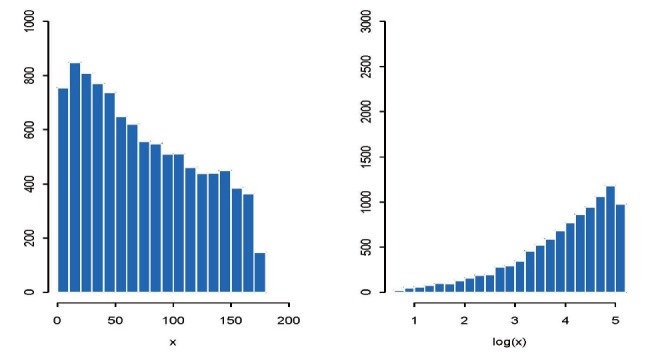

In general, for right-skewed data, the log-transformation may make it either right-or left-skewed. If the original data does follow a log-normal distribution, the log-transformed data will follow or approximately follow the normal distribution. However, in general there is no guarantee that the log-transformation will reduce skewness and make the data a better approximation of the normal distribution.

Survived is the variable we need to predict. So let's do some analysis on this variable first.

''' identiying what kind of skewed we need to apply right or left ? '''

from scipy.stats import norm, skew

sb.distplot(balanced_train_dataset['Survived'],fit=norm)

(mean,std)=norm.fit(balanced_train_dataset['Survived'])
print("mean : %f std: %f"%(mean,std))

plt.legend(['Normal distribution mean: %f and std: %f'%(mean,std)])
plt.xlabel('Survived')
plt.ylabel('Frequency')

fig=plt.figure()

from scipy import stats
result=stats.probplot(balanced_train_dataset['Survived'],plot=plt)
plt.show()

The target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.

import numpy as np
balanced_train_dataset['Survived']=np.log1p(balanced_train_dataset['Survived'])

sb.distplot(balanced_train_dataset['Survived'],fit=norm)

(mean,std)=norm.fit(balanced_train_dataset['Survived'])

plt.legend('Norm Distribution mean %.3f and std %.3f'%(mean,std))
plt.xlabel('Frequency')
plt.ylabel('Survived')
plt.title('Sales Distribution')

fig=plt.figure()
stats.probplot(balanced_train_dataset['Survived'],plot=plt)
plt.show()

As per above distribution is skewed happened little bit (frequency compressed a bit)... Because its classification either 0 or 1 so output is discrete...
It will work better in regression(continues intervels)

# 3. Feature Selection

Feature selection is to ignore irrelevant or partially relevant features can negatively impact model performance.

Identifying the related features from a set of data and removing the irrelevant or less important features with do not contribute much to our target variable in order to achieve better accuracy for our model.

Feature Selection is one of the core concepts in machine learning which hugely impacts the performance of your model. The data features that you use to train your machine learning models have a huge influence on the performance you can achieve.

Feature Selection is the process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in.

Having irrelevant features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features.

How to select features and what are Benefits of performing feature selection before modeling your data?
· Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
· Improves Accuracy: Less misleading data means modeling accuracy improves.
· Reduces Training Time: fewer data points reduce algorithm complexity and algorithms train faster.

**I want to share my personal experience with this.**

I prepared a model by selecting all the features and I got an accuracy of around 65% which is not pretty good for a predictive model and after doing some feature selection and feature engineering without doing any logical changes in my model code my accuracy jumped to 81% which is quite impressive

Now you know why I say feature selection should be the first and most important step of your model design.

**Feature Selection Methods:**

I will share 3 Feature selection techniques that are easy to use and also gives good results.
 1. Univariate Selection
 2. Feature Importance
 3. Correlation Matrix with Heatmap

**3a. Univariate Selection**

Statistical tests can be used to select those features that have the strongest relationship with the output variable.
The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Titanic Survived Prediction Dataset.

In [160]:
'''apply SelectKBest class to extract top 10 best features... 
if you have more than 10 features it will show top 10 and if you have less than 10 features then,
we have use k=all or else it will through an error (ValueError: k should be >=0, <= n_features = 8; got 10. Use k='all' to return all features), 
we still can keep 10 as max features'''

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

x=balanced_train_dataset.iloc[:,1:]
y=balanced_train_dataset.iloc[:,0:1]

# Applying SelectKBest class to extract
# k-- No of features we want to display or top features we want to visualise
bestfeature=SelectKBest(score_func=chi2,k=8)
fit_selectkbest=bestfeature.fit(x,y)

dataframe_scores=pd.DataFrame(fit_selectkbest.scores_)
dataframe_columns=pd.DataFrame(x.columns)

# concat two data frame for better visualization
feature_score=pd.concat([dataframe_columns,dataframe_scores],axis=1)

# Naming the dataframe columns
feature_score.columns=['Specs','Score']

# print top 10 best features
print(feature_score.nlargest(8,'Score'))

      Specs        Score
5    Ticket  2253.822259
6      Fare  1982.356991
1       Sex   114.024911
0    Pclass    20.678238
2       Age    19.755466
4     Parch    12.544402
7  Embarked     7.160555
3     SibSp     0.299401


As per above selectkbest feature selection we can ingoner irrelavent or partial relevent features (Embarked and Sibsp) columns

**3b. Feature Importance**

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset basically if we have less than 10 features then better use all features.

[0.07513309 0.24784074 0.184247   0.04625921 0.04384853 0.21516925
 0.15704053 0.03046166]


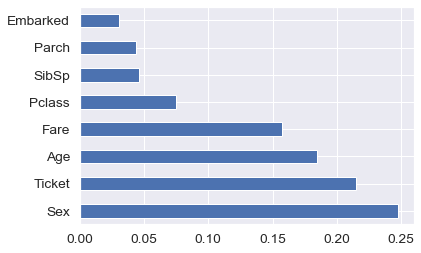

In [161]:
# Feature importance using extratreesclassifier

from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)

# user inbuild class feature_importances of tree based classifier
print(model.feature_importances_)

# plotting the graph of feature importances for better visualization
importance=pd.Series(model.feature_importances_,index=x.columns)
importance.nlargest(8).plot(kind='barh')
plt.show()

**3c. Correlation Matrix With HeatMap**

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

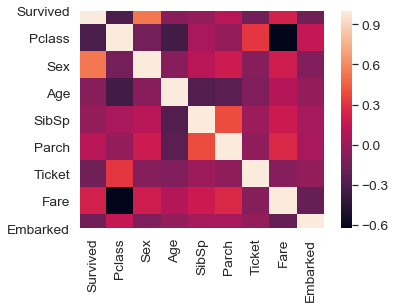

In [162]:
# correlation matrix is used to identify the relation percentage between each other...

correlation_matrix=balanced_train_dataset.corr()
sb.heatmap(correlation_matrix,square=True)

Correlation values isnt visible.... and its bit confusing also, lets go ahead with indeapth analysis..

I am going to show you 2 logical way to see correlation values in heatmap

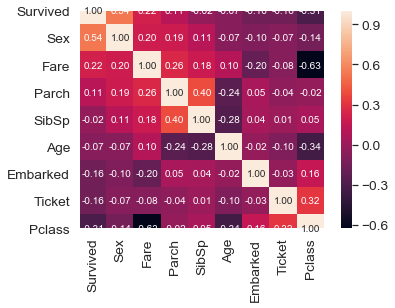

In [163]:
#1.
# correlation coefficient value for survived output attribute by dataframe technique
import numpy as np
k=10 # selecting top 10 correlation matrix to visualise
columns=correlation_matrix.nlargest(k,'Survived')['Survived'].index

correlation_coefficient=np.corrcoef(balanced_train_dataset[columns].values.T)
sb.set(font_scale=1.25)

Zoomin_heatmap=sb.heatmap(correlation_coefficient,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10},yticklabels=columns.values,
                         xticklabels=columns.values)
plt.show()

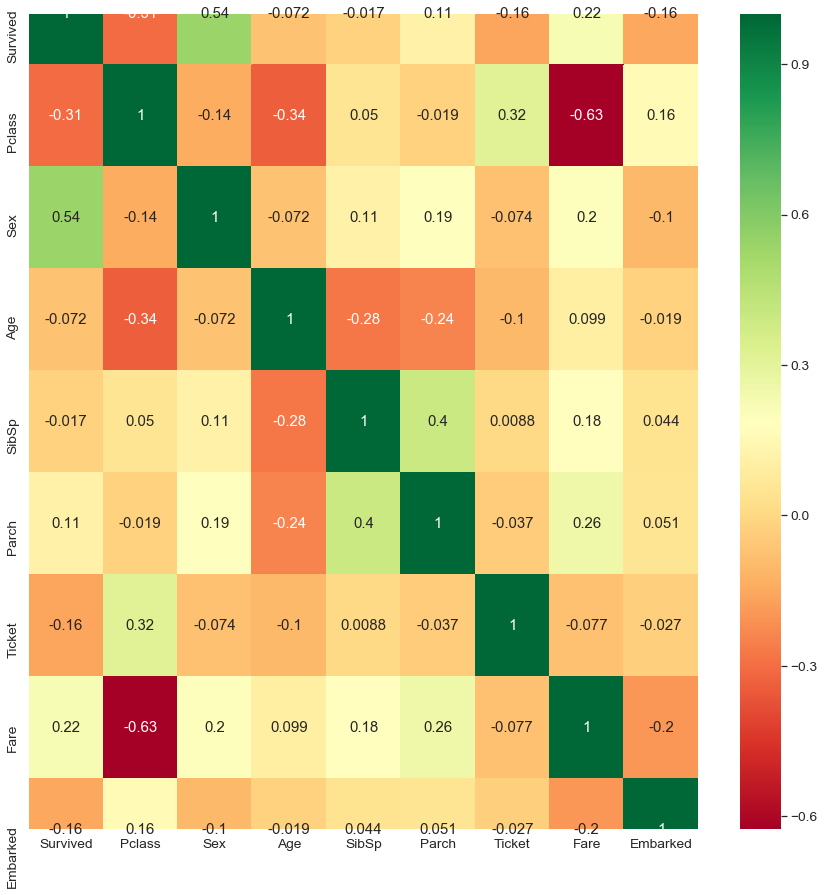

In [164]:
#2.
# Correlatio coefficient value for survived attribute by after convert from dataframe to array of matrix technique

#get correlations of each features in dataset
feature_maps=balanced_train_dataset.corr()
top_corr_features=feature_maps.index
plt.figure(figsize=(15,15))

# plot for heatmap
g=sb.heatmap(balanced_train_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Correlation value between 2 indepedent variable

**Correlation values based on output attribute**

In [165]:
# Correlation input attribute relation with output attribute

correlation=balanced_train_dataset.corr()['Survived']
correlation.abs().sort_values(ascending=False)

Survived    1.000000
Sex         0.540022
Pclass      0.306490
Fare        0.221221
Ticket      0.160931
Embarked    0.155263
Parch       0.112329
Age         0.071558
SibSp       0.016756
Name: Survived, dtype: float64

I showed 3 feature selection techniques... so i am taking count of correlation matrix with heatmap... you guys can try 3 selection and keep best selection technqiue based on best prediction one....

As per above correlation values Age and sibsp attribute have less correlation.. so now we can neglet those 2 rows now...

In [166]:
# Removing less correlated values Age and SibSp

columns=['Age','SibSp']
balanced_train_dataset=balanced_train_dataset.drop(columns,axis=1)
balanced_train_dataset.head()

,Survived,Pclass,Sex,Parch,Ticket,Fare,Embarked
643,1,3,0,0,79,56.4958,2
298,1,1,0,0,97,30.5000,2
465,0,3,0,0,638,7.0500,2
346,1,2,1,0,256,13.0000,2
875,1,3,1,0,194,7.2250,0


In [167]:
# Removing less correlated values Age and SibSp

columns=['Age','SibSp']
test_dataset=test_dataset.drop(columns,axis=1)
test_dataset.head()

,Pclass,Sex,Parch,Ticket,Fare,Embarked
0,3,1,0,152,7.8292,1
1,3,0,0,221,7.0000,2
2,2,1,0,73,9.6875,1
3,3,1,0,147,8.6625,2
4,3,0,1,138,12.2875,2


**2h. Feature Scaling( scaling input attributes).**

I'm going to apply feature scaling within model itself. 

**2i. Feature Split ( splitting training and test set).**

Splitting the features into training and test sets.

Before Splitting the dataset into training and tests. We need to convert the dataset from dataframe to array of matrix for that, I preferd to approach 2 techniques. They are...

In [168]:
# 1. first technique
array_data=balanced_train_dataset.values
x1=array_data[:,1:]
y1=array_data[:,0:1]
print(x1[:5,])
print(y1[:5,])

[[  3.       0.       0.      79.      56.4958   2.    ]
 [  1.       0.       0.      97.      30.5      2.    ]
 [  3.       0.       0.     638.       7.05     2.    ]
 [  2.       1.       0.     256.      13.       2.    ]
 [  3.       1.       0.     194.       7.225    0.    ]]
[[1.]
 [1.]
 [0.]
 [1.]
 [1.]]


In [169]:
# 2. Second technique is used iloc funcation to slice the dataframe from certian range

x2=balanced_train_dataset.iloc[:,1:].values
y2=balanced_train_dataset.iloc[:,0:1].values
print(x2[:5,:])
print(y2[:5,])

[[  3.       0.       0.      79.      56.4958   2.    ]
 [  1.       0.       0.      97.      30.5      2.    ]
 [  3.       0.       0.     638.       7.05     2.    ]
 [  2.       1.       0.     256.      13.       2.    ]
 [  3.       1.       0.     194.       7.225    0.    ]]
[[1]
 [1]
 [0]
 [1]
 [1]]


By using train_test_split class we are going to split the training and test set bsaed on percentage ratio.....

In [170]:
x_train=x2
y_train=y2
x_test=test_dataset

# 4. Model Selection

**4a. Model Selection Using Spot Check and Compare Algorithms Without Feature Scaling**

In [171]:
# Importing classifier algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
neighbors=4

In [172]:
# Keep all model in one pipeline

models=[]
models.append(('Logistic Regression',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier(n_neighbors=neighbors)))
models.append(('SVC',SVC()))
models.append(('Naive Bayes',GaussianNB()))

In [173]:
# Evaluate each model
import warnings; 
warnings.simplefilter('ignore')
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
classifier_names=[]
classifier_predictions=[]
classifier_scoring='accuracy'

for name,model in models:
    fold=KFold(n_splits=10,random_state=5)
    result=cross_val_score(model,x_train,y_train,cv=fold,scoring=classifier_scoring)
    classifier_predictions.append(result)
    classifier_names.append(name)
    msg="%s: %f and %f"%(name,result.mean(),result.std())
    print(msg)

Logistic Regression: 0.756102 and 0.057582
KNN: 0.659219 and 0.056419
SVC: 0.660711 and 0.085669
Naive Bayes: 0.760623 and 0.055353


Output accuracies from model without feature scaling

Logistic Regression: 0.742662 and 0.059735

KNN: 0.636897 and 0.033126

SVC: 0.659504 and 0.055050

Naive Bayes: 0.737107 and 0.064947

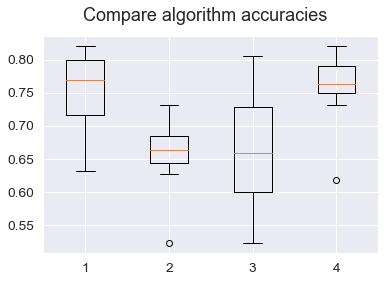

In [174]:
# plotting the traning accuracy using boxplot

fig=plt.figure()
plt.suptitle('Compare algorithm accuracies')
plt.boxplot(classifier_predictions)
plt.show()

As per above plot its clear that logistic regression giving the best accuracy followed by navie bayes classifier....

Lets go ahead with model selection with feature scaling

**4b. Model Selection Using Spot Check and Compare Algorithms With Feature Scaling**

In [175]:
# creating pipeline with feature scaling followed by algorithm

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer

In [176]:
# Algorithms

scaled_models=[]
scaled_models.append(("Scaled Logisitic Regression",Pipeline([('normalizer',Normalizer()),
                                                              ('scaled Logistic Regression',LogisticRegression())])))
scaled_models.append(('Scaled KNN',Pipeline([('normalizer',Normalizer()),
                                             ('scaled Knn',KNeighborsClassifier(n_neighbors=neighbors))])))
scaled_models.append(('Scaled Naive Bayes',Pipeline([('Normalizer',Normalizer()),
                                                     ('Scaled Naive bayes',GaussianNB())])))
scaled_models.append(('scaled SVC',Pipeline([('normalizer',Normalizer()),
                                             ('Scaled SVC',SVC())])))

In [177]:
# Evaluate each model

scaled_names=[]
scaled_predictions=[]
for name,model in scaled_models:
    fold=KFold(n_splits=10,random_state=5)
    result=cross_val_score(model,x_train,y_train,cv=fold,scoring=classifier_scoring)
    scaled_predictions.append(result)
    scaled_names.append(name)
    msg="Algorithm : %s, mean: %f, Std_dev:%f"%(name,result.mean(),result.std())
    print(msg)

Algorithm : Scaled Logisitic Regression, mean: 0.617625, Std_dev:0.054690
Algorithm : Scaled KNN, mean: 0.648859, Std_dev:0.040498
Algorithm : Scaled Naive Bayes, mean: 0.654917, Std_dev:0.057725
Algorithm : scaled SVC, mean: 0.586392, Std_dev:0.066330


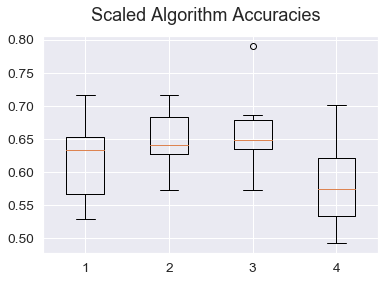

In [178]:
fig=plt.figure()
plt.suptitle("Scaled Algorithm Accuracies")
plt.boxplot(scaled_predictions)
plt.show()

As per above scaled result KNN and naive bayes accuracy is good. Accuracy is not good as excepted, but we have a ways to imporve accuries by using hyper parameter tunning

**4c. Regularization Hyper Parameter Tunning For Navie Bayes and KNN**

**GridSearchCV**

Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. This is significant as the performance of the entire model is based on the hyper parameter values specified.

If you work with ML, you know what a nightmare it is to stipulate values for hyper parameters. There are libraries that have been implemented, such as GridSearchCV of the sklearn library, in order to automate this process and make life a little bit easier for ML enthusiasts.

First, we need to import GridSearchCV from the sklearn library, a machine learning library for python. The estimator parameter of GridSearchCV requires the model we are using for the hyper parameter tuning process. For this example, we are using the rbf kernel of the Support Vector Regression model(SVR). The param_grid parameter requires a list of parameters and the range of values for each parameter of the specified estimator. The most significant parameters required when working with the rbf kernel of the SVR model are c, gamma and epsilon. A list of values to choose from should be given to each hyper parameter of the model. You can change these values and experiment more to see which value ranges give better performance. A cross validation process is performed in order to determine the hyper parameter value set which provides the best accuracy levels.

1. gsc = GridSearchCV(
        estimator=SVR(kernel='rbf'),
        param_grid={
            'C': [0.1, 1, 100, 1000],
            'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
        
2. grid_result = gsc.fit(X, y)
3. best_params = grid_result.best_params_
4. best_svr = SVR(kernel='rbf', C=best_params["C"], epsilon=best_params["epsilon"], gamma=best_params["gamma"],
                   coef0=0.1, shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1)
                   
We then use the best set of hyper parameter values chosen in the grid search, in the actual model as shown above.

In [179]:
# Navie Bayes doesn't have parameters to tune, So accuracy remains same.
GaussianNB().get_params().keys()

dict_keys(['priors', 'var_smoothing'])

In [180]:
# Regularization hyperparameter tunning for KNN.
KNeighborsClassifier().get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [181]:
# Regularization Hyperparameter Tunning

from sklearn.model_selection import GridSearchCV
scaled_xtrain=Normalizer().fit_transform(x_train)

In [182]:
# Hyper parameters for KNN algorithm
param_grid=dict(n_neighbors=[2,3,4,5,6,7,8,9,10],weights=['uniform', 'distance'],p=[1,2])

# GridSearchCV to tune and identify proper parameter.
model=KNeighborsClassifier()
fold=KFold(n_splits=10,random_state=5)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=classifier_scoring,cv=fold,n_jobs=-1)
grid_result=grid.fit(scaled_xtrain,y_train)

print("best parameters: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

best parameters: 0.727679 using {'n_neighbors': 10, 'p': 1, 'weights': 'distance'} 


Sounds really great, accuracy increased from 63.6% to 72.2%, with best parameter tunning... Lets look how it works on ensemble algorithms

**4d. Ensemble Algorithms (Bagging and Boosting Algorithms)**

When you want to purchase a new car, will you walk up to the first car shop and purchase one based on the advice of the dealer? It’s highly unlikely.

You would likely browser a few web portals where people have posted their reviews and compare different car models, checking for their features and prices. You will also probably ask your friends and colleagues for their opinion. In short, you wouldn’t directly reach a conclusion, but will instead make a decision considering the opinions of other people as well.

Ensemble models in machine learning operate on a similar idea. They combine the decisions from multiple models to improve the overall performance. This can be achieved in various ways, which you will discover

Let’s understand the concept of ensemble learning with an example. Suppose you are a movie director and you have created a short movie on a very important and interesting topic. Now, you want to take preliminary feedback (ratings) on the movie before making it public. What are the possible ways by which you can do that?

A: You may ask one of your friends to rate the movie for you.
Now it’s entirely possible that the person you have chosen loves you very much and doesn’t want to break your heart by providing a 1-star rating to the horrible work you have created.

B: Another way could be by asking 5 colleagues of yours to rate the movie.
This should provide a better idea of the movie. This method may provide honest ratings for your movie. But a problem still exists. These 5 people may not be “Subject Matter Experts” on the topic of your movie. Sure, they might understand the cinematography, the shots, or the audio, but at the same time may not be the best judges of dark humour.

C: How about asking 50 people to rate the movie?
Some of which can be your friends, some of them can be your colleagues and some may even be total strangers.

The responses, in this case, would be more generalized and diversified since now you have people with different sets of skills. And as it turns out – this is a better approach to get honest ratings than the previous cases we saw.

With these examples, you can infer that a diverse group of people are likely to make better decisions as compared to individuals. Similar is true for a diverse set of models in comparison to single models. This diversification in Machine Learning is achieved by a technique called Ensemble Learning.

**1. Bagging:**

The idea behind bagging is combining the results of multiple models (for instance, all decision trees) to get a generalized result. Here’s a question: If you create all the models on the same set of data and combine it, will it be useful? There is a high chance that these models will give the same result since they are getting the same input. So how can we solve this problem? One of the techniques is bootstrapping.

Bootstrapping is a sampling technique in which we create subsets of observations from the original dataset, with replacement. The size of the subsets is the same as the size of the original set.

Bagging (or Bootstrap Aggregating) technique uses these subsets (bags) to get a fair idea of the distribution (complete set). The size of subsets created for bagging may be less than the original set.

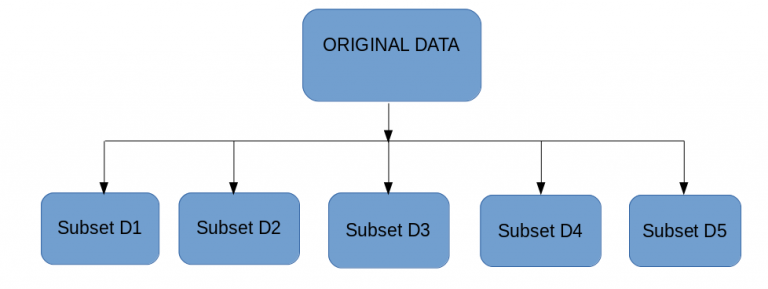

1. Multiple subsets are created from the original dataset, selecting observations with replacement.
2. A base model (weak model) is created on each of these subsets.
3. The models run in parallel and are independent of each other.
4. The final predictions are determined by combining the predictions from all the models.
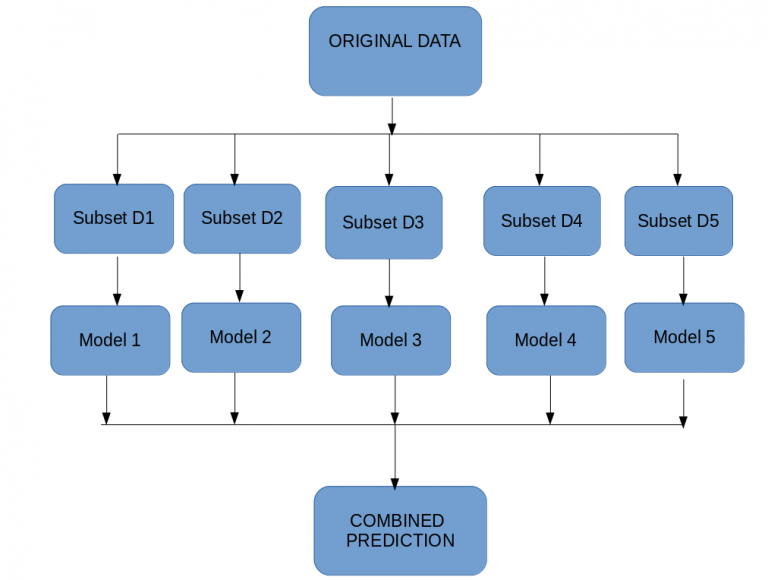

**2. Boosting**

Before we go further, here’s another question for you: If a data point is incorrectly predicted by the first model, and then the next (probably all models), will combining the predictions provide better results? Such situations are taken care of by boosting.

Boosting is a sequential process, where each subsequent model attempts to correct the errors of the previous model. The succeeding models are dependent on the previous model. Let’s understand the way boosting works in the below steps.

1. A subset is created from the original dataset.
2. Initially, all data points are given equal weights.
3. A base model is created on this subset.
4. This model is used to make predictions on the whole dataset
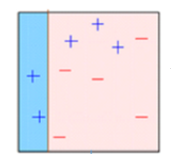

5. Errors are calculated using the actual values and predicted values.
6. The observations which are incorrectly predicted, are given higher weights.(Here, the three misclassified blue-plus points will be given higher weights)
7. Another model is created and predictions are made on the dataset.(This model tries to correct the errors from the previous model)
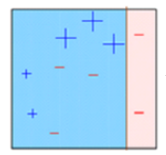

8. Similarly, multiple models are created, each correcting the errors of the previous model.
9. The final model (strong learner) is the weighted mean of all the models (weak learners).
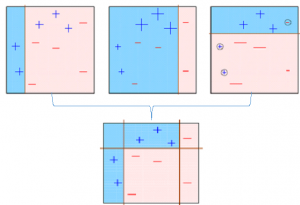

Thus, the boosting algorithm combines a number of weak learners to form a strong learner. The individual models would not perform well on the entire dataset, but they work well for some part of the dataset. Thus, each model actually boosts the performance of the ensemble.
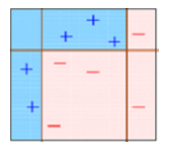

Bagging Algorithms:

1. Bagged Decision Tree
2. Random Forest 
3. Extra Tree 

Boosting Algorithms:

1. AdaBoost
2. Gradient Descent (Stochastic Gradient Boosting)
3. XGBoost (Extra Gradient Boosting)

In [183]:
# Importing the ensemble boosting and bagging algorithms

# Bagging 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
'''import xgboost as xgb''' # Beacuse i didnt installed XGBoost in my system i will update once i installed

'import xgboost as xgb'

In [184]:
# holding feature scaling and algorithm as a pipeline technqiue

estimators=10
ensemble_models=[]
ensemble_models.append(('Scaled Random Forest',Pipeline([('Scaling',Normalizer()),
                                                         ('Random Forest',RandomForestClassifier(n_estimators=estimators))])))
ensemble_models.append(('Scaled Decision Tree',Pipeline([('Scaling',Normalizer()),
                                                         ('Decision Tree',DecisionTreeClassifier())])))
ensemble_models.append(('Scaled Extra Tree',Pipeline([('SCaling',Normalizer()),
                                                      ('Extra Tree',ExtraTreesClassifier(n_estimators=estimators))])))
ensemble_models.append(('Scaled Ada Boost',Pipeline([('Scaling',Normalizer()),
                                                     ('Ada Boost',AdaBoostClassifier())])))
ensemble_models.append(('Scaled Gradient Boost',Pipeline([('Scaling',Normalizer()),
                                                          ('Gradient Boosting',GradientBoostingClassifier())])))

In [185]:
# Evaluating each ensemble models

ensemble_names=[]
ensemble_predictions=[]

for name,model in ensemble_models:
    fold=KFold(n_splits=10,random_state=5)
    result=cross_val_score(model,x_train,y_train,cv=fold,scoring=classifier_scoring)
    ensemble_predictions.append(result)
    ensemble_names.append(name)
    msg= " algorithm: %s , mean accuracy: %f and Std_dev: %f"%(name,result.mean(),result.std())
    print(msg)

 algorithm: Scaled Random Forest , mean accuracy: 0.779741 and Std_dev: 0.051252
 algorithm: Scaled Decision Tree , mean accuracy: 0.748464 and Std_dev: 0.066682
 algorithm: Scaled Extra Tree , mean accuracy: 0.770698 and Std_dev: 0.054344
 algorithm: Scaled Ada Boost , mean accuracy: 0.776932 and Std_dev: 0.055954
 algorithm: Scaled Gradient Boost , mean accuracy: 0.819930 and Std_dev: 0.048814


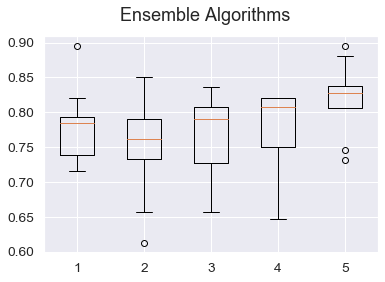

In [186]:
# Visualize the result
fig=plt.figure()
plt.suptitle('Ensemble Algorithms')
plt.boxplot(ensemble_predictions)
plt.show()

We got Good accuray above 75% that sounds fabulous.... Without applying the regualarization hyper parameter tunning.. 

Now we are applying hyper parameter tunning to all this algorithms

**4e. Regularization Hyper Parameter Tunning For Random Forest Classifier**

In [187]:
# Regularization hyper parameter tunning for Random Forest using GridSearchCV
scaled_xtrain=Normalizer().fit_transform(x_train)
model=RandomForestClassifier()
fold=KFold(n_splits=10,random_state=5)

param_grid=dict(n_estimators=[2,4,6,8,10,12,14,16,18,20,25,30,35,40,45,50,100],criterion=['gini', 'entropy'])
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=fold,scoring=classifier_scoring,n_jobs=-1)

grid_result=grid.fit(scaled_xtrain,y_train)
print("Best:%f using %s "%(grid_result.best_score_,grid_result.best_params_))

Best:0.800595 using {'criterion': 'gini', 'n_estimators': 30} 


In [188]:
# Regularization hyper parameter tunning for Random Forest using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid=dict(n_estimators=[2,4,6,8,10,12,14,16,18,20,25,30,35,40,45,50,100],criterion=['gini', 'entropy'])
grid=RandomizedSearchCV(estimator=model,param_distributions=param_grid,cv=fold,scoring=classifier_scoring,n_jobs=-1)

grid_result=grid.fit(scaled_xtrain,y_train)
print("Best:%f using %s "%(grid_result.best_score_,grid_result.best_params_))

Best:0.794643 using {'n_estimators': 6, 'criterion': 'gini'} 


**4f. Regularization Hyper Parameter Tunning For Extra Tree Classifier**

In [189]:
# Regularization hyper parameter tunning for Extra Tree using GridSearchCV
scaled_xtrain=Normalizer().fit_transform(x_train)
model=ExtraTreesClassifier()
fold=KFold(n_splits=10,random_state=5)

param_grid=dict(n_estimators=[2,4,6,8,10,12,14,16,18,20,25,30,35,40,45,50,100],criterion=['gini', 'entropy'])
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=fold,scoring=classifier_scoring,n_jobs=-1)

grid_result=grid.fit(scaled_xtrain,y_train)
print("Best:%f using %s "%(grid_result.best_score_,grid_result.best_params_))

Best:0.779762 using {'criterion': 'entropy', 'n_estimators': 10} 


In [190]:
# Regularization hyper parameter tunning for Extra Tree using RandomizedSearchCV
param_grid=dict(n_estimators=[2,4,6,8,10,12,14,16,18,20,25,30,35,40,45,50,100],criterion=['gini', 'entropy'])
grid=RandomizedSearchCV(estimator=model,param_distributions=param_grid,cv=fold,scoring=classifier_scoring,n_jobs=-1)

grid_result=grid.fit(scaled_xtrain,y_train)
print("Best:%f using %s "%(grid_result.best_score_,grid_result.best_params_))

Best:0.779762 using {'n_estimators': 6, 'criterion': 'gini'} 


**4g. Regularization Hyper Parameter Tunning For Ada Boost Classifier**

In [191]:
# Regualarization hyper parameter tunning for Ada Boost using GridSearchCV
scaled_xtrain=Normalizer().fit_transform(x_train)
model=AdaBoostClassifier()
fold=KFold(n_splits=10,random_state=5)

param_grid=dict(n_estimators=[10,15,20,25,30,35,40,45,50,100,150,200,250,300],learning_rate=[0.01,0.1,0.2,0.3,0.4,0.5,0.6])
grid=GridSearchCV(estimator=model,cv=fold,param_grid=param_grid,n_jobs=-1,scoring=classifier_scoring)

grid_result=grid.fit(scaled_xtrain,y_train)
print("Best %f using %s"%(grid_result.best_score_,grid_result.best_params_))

Best 0.800595 using {'learning_rate': 0.5, 'n_estimators': 250}


In [192]:
# Regularization hyper parameter tunning for Ada Boost using RandomizedSearchCV
param_grid=dict(n_estimators=[10,15,20,25,30,35,40,45,50,100,150,200,250,300],learning_rate=[0.01,0.1,0.2,0.3,0.4,0.5,0.6])
grid=RandomizedSearchCV(estimator=model,param_distributions=param_grid,cv=fold,scoring=classifier_scoring,n_jobs=-1)

grid_result=grid.fit(scaled_xtrain,y_train)
print("Best:%f using %s "%(grid_result.best_score_,grid_result.best_params_))

Best:0.796131 using {'n_estimators': 150, 'learning_rate': 0.5} 


**4h. Regularization Hyper Parameter Tunning For Gradient Boosting Classifier**

In [193]:
# Regularisation hyper prameter tunning for Gradient boosting using GridSearchCV

model=GradientBoostingClassifier()
fold=KFold(n_splits=10,random_state=5)

param_grid=dict(learning_rate=[0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7],
            n_estimators=[10,20,30,50,100,150,200,250])
grid=GridSearchCV(estimator=model,cv=fold,scoring=classifier_scoring,param_grid=param_grid,n_jobs=-1)

grid_result=grid.fit(scaled_xtrain,y_train)
print("Best : %f using %s"%(grid_result.best_score_,grid_result.best_params_))

Best : 0.819940 using {'learning_rate': 0.1, 'n_estimators': 100}


In [194]:
#Regularisation hyper prameter tunning for Gradient boosting using RandomizedSearchCV
param_grid=dict(learning_rate=[0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7],
            n_estimators=[10,20,30,50,100,150,200,250])
grid=RandomizedSearchCV(estimator=model,param_distributions=param_grid,cv=fold,scoring=classifier_scoring,n_jobs=-1)

grid_result=grid.fit(scaled_xtrain,y_train)
print("Best:%f using %s "%(grid_result.best_score_,grid_result.best_params_))

Best:0.799107 using {'n_estimators': 250, 'learning_rate': 0.2} 


We tunned lot of classifier algorithms as well as ensemble algorithms....Among them Gradient Boosting giving the best accuracy around 78.3% accuracy... So lets train and test gradient boosting algorithm

**4i. Gradient Boosting Algorithm For Titanic Survived Predictions.**

In [195]:
# importing libraries

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [196]:
# Rescaling training and test set
scaled=Normalizer().fit(x_train)
scaled_xtrain=scaled.transform(x_train)
scaled_xtest=scaled.transform(x_test)

In [197]:
# Algorithm fitting
model=GradientBoostingClassifier(n_estimators=150,learning_rate=0.05)
model_fit=model.fit(scaled_xtrain,y_train)

In [198]:
# Predicting Algorithm 
y_pred=model_fit.predict(scaled_xtest)
print(y_pred)

[1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0
 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1
 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0
 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0
 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1
 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0
 1 0 0 0 1 0 1 0 1 1 1]


We are unable to check accuracy rate for test set... if you like the kernel please do upvote 

In [199]:
# output
output=pd.DataFrame({'PassengerId':test_dataset1.PassengerId,'Survived':y_pred})
output.to_csv("my_submission.csv",index=False)
print("Submission sucessfully")

Submission sucessfully


# 5. Deep Learning Neural Networks

Now we are checking the accuracies